In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
test = pd.read_csv(r'/content/drive/MyDrive/Real World Analytics Challenge/data_22_23_5.csv', low_memory=False)

In [ ]:
# prompt: give me a steamlit code to show name of best player according to overall rating position wise

import streamlit as st
import pandas as pd

# Assuming 'test' is your DataFrame with columns like 'Name', 'Overall', and 'Position'

def best_player_by_position(df):
    best_players = df.groupby('Position').agg({'Overall': 'idxmax', 'Name': 'first'}).reset_index()
    return best_players[['Position', 'Name', 'Overall']]

st.title("Best Players by Position")

best_players = best_player_by_position(test)
st.table(best_players)


In [ ]:
# prompt: split the player_traits column into new columns after the delimiter comma(,) and name the columns as player_traits 1, player_traits_2 and so on

import pandas as pd
# Assuming 'test' is your DataFrame with a 'player_traits' column

# Split the 'player_traits' column into multiple columns
split_traits = test['player_traits'].str.split(',', expand=True)

# Rename the new columns
split_traits.columns = ['player_traits_' + str(i+1) for i in range(split_traits.shape[1])]

# Concatenate the original DataFrame with the new columns
test = pd.concat([test, split_traits], axis=1)

# Drop the original 'player_traits' column if you don't need it anymore
test = test.drop('player_traits', axis=1)

In [ ]:
# prompt: delete player_positions column

# Drop the 'player_positions' column
test = test.drop('player_positions', axis=1)


In [ ]:
test.head()

,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22,L. Messi,93,93,78000000,320000,34,170,72,...,0,https://cdn.sofifa.net/players/158/023/22_120.png,Finesse Shot,Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,One Club Player,Chip Shot (AI),Technical Dribbler (AI),None
1,188545,22,R. Lewandowski,92,92,119500000,270000,32,185,81,...,0,https://cdn.sofifa.net/players/188/545/22_120.png,Solid Player,Finesse Shot,Outside Foot Shot,Chip Shot (AI),None,None,None,None
2,20801,22,Cristiano Ronaldo,91,91,45000000,270000,36,187,83,...,0,https://cdn.sofifa.net/players/020/801/22_120.png,Power Free-Kick,Flair,Long Shot Taker (AI),Speed Dribbler (AI),Outside Foot Shot,None,None,None
3,190871,22,Neymar Jr,91,91,129000000,270000,29,175,68,...,0,https://cdn.sofifa.net/players/190/871/22_120.png,Injury Prone,Flair,Speed Dribbler (AI),Playmaker (AI),Outside Foot Shot,Technical Dribbler (AI),None,None
4,192985,22,K. De Bruyne,91,91,125500000,350000,30,181,70,...,0,https://cdn.sofifa.net/players/192/985/22_120.png,Injury Prone,Leadership,Early Crosser,Long Passer (AI),Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,None


In [26]:
# prompt: download this excel file

from google.colab import files
test.to_excel('output.xlsx', index=False)
files.download('output.xlsx')


KeyboardInterrupt: 

In [27]:
test = pd.read_csv(r'/content/drive/MyDrive/Real World Analytics Challenge/data_22_23_6.csv', low_memory=False)

In [28]:
pd.set_option('display.max_columns', None)
test.head()

,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22,L. Messi,93,93,78000000,320000,34,170,72,Ligue 1,1,Paris Saint-Germain,RW,Argentina,Left,4,4,85,92,91,95,34,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0,https://cdn.sofifa.net/players/158/023/22_120.png,Finesse Shot,Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,One Club Player,Chip Shot (AI),Technical Dribbler (AI),NaN
1,188545,22,R. Lewandowski,92,92,119500000,270000,32,185,81,Bundesliga,1,FC Bayern München,ST,Poland,Right,4,4,78,92,79,86,44,82,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0,https://cdn.sofifa.net/players/188/545/22_120.png,Solid Player,Finesse Shot,Outside Foot Shot,Chip Shot (AI),NaN,NaN,NaN,NaN
2,20801,22,Cristiano Ronaldo,91,91,45000000,270000,36,187,83,Premier League,1,Manchester United,ST,Portugal,Right,4,5,87,94,80,88,34,75,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0,https://cdn.sofifa.net/players/020/801/22_120.png,Power Free-Kick,Flair,Long Shot Taker (AI),Speed Dribbler (AI),Outside Foot Shot,NaN,NaN,NaN
3,190871,22,Neymar Jr,91,91,129000000,270000,29,175,68,Ligue 1,1,Paris Saint-Germain,LW,Brazil,Right,5,5,91,83,86,94,37,63,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0,https://cdn.sofifa.net/players/190/871/22_120.png,Injury Prone,Flair,Speed Dribbler (AI),Playmaker (AI),Outside Foot Shot,Technical Dribbler (AI),NaN,NaN
4,192985,22,K. De Bruyne,91,91,125500000,350000,30,181,70,Premier League,1,Manchester City,RCM,Belgium,Right,5,4,76,86,93,88,64,78,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0,https://cdn.sofifa.net/players/192/985/22_120.png,Injury Prone,Leadership,Early Crosser,Long Passer (AI),Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,NaN


In [29]:
# prompt: give me boxplot for numeric columns except player_id, weak foot, skill move

import numpy as np
# Select numeric columns except specified ones
numeric_cols = test.select_dtypes(include=np.number).columns.difference(['player_id', 'weak_foot', 'skill_moves','fifa_version','league_level'])

# Create boxplots for each numeric column
for col in numeric_cols:
  fig = px.box(test, y=col, title=f"Boxplot of {col}")
  fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [30]:
# prompt: treat outliers where you are getting outliers in above mentioned columns

import numpy as np
# Select numeric columns except specified ones
numeric_cols = test.select_dtypes(include=np.number).columns.difference(['player_id', 'weak_foot', 'skill_moves'])

# Handle outliers for each numeric column
for col in numeric_cols:
    # Calculate IQR
    Q1 = test[col].quantile(0.25)
    Q3 = test[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median
    test[col] = np.where((test[col] < lower_bound) | (test[col] > upper_bound),
                         test[col].median(), test[col])

# Create boxplots for each numeric column after outlier treatment
for col in numeric_cols:
  fig = px.box(test, y=col, title=f"Boxplot of {col} (After Outlier Treatment)")
  fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [31]:
# prompt: do the numerical encoding for the columns league_name, club_name, club_position, nationality_name, preferred_foot

# Perform numerical encoding for categorical columns
label_encoder = LabelEncoder()
test['league_name'] = label_encoder.fit_transform(test['league_name'])
test['club_name'] = label_encoder.fit_transform(test['club_name'])
test['club_position'] = label_encoder.fit_transform(test['club_position'])
test['nationality_name'] = label_encoder.fit_transform(test['nationality_name'])
test['preferred_foot'] = label_encoder.fit_transform(test['preferred_foot'])


In [32]:
# prompt: put "Not Available" in blanks in last 8 columns

# Fill blanks in the last 8 columns with "Not Available"
test.iloc[:, -8:] = test.iloc[:, -8:].fillna("Not Available")


In [33]:
pd.set_option('display.max_columns', None)
test.head()

,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22.0,L. Messi,67.0,72.0,1200000.0,4000.0,34.0,170.0,72.0,26,1.0,734,25,5,0,4,4,85.0,92.0,58.0,64.0,34.0,65.0,85.0,95.0,70.0,64.0,88.0,63.0,93.0,94.0,91.0,64.0,91.0,80.0,91.0,63.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,58.0,75.0,61.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,Finesse Shot,Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,One Club Player,Chip Shot (AI),Technical Dribbler (AI),Not Available
1,188545,22.0,R. Lewandowski,67.0,72.0,1200000.0,4000.0,32.0,185.0,81.0,6,1.0,360,27,110,1,4,4,78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,63.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,Solid Player,Finesse Shot,Outside Foot Shot,Chip Shot (AI),Not Available,Not Available,Not Available,Not Available
2,20801,22.0,Cristiano Ronaldo,67.0,72.0,1200000.0,4000.0,36.0,187.0,83.0,32,1.0,625,27,111,1,4,5,87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,63.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,61.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,Power Free-Kick,Flair,Long Shot Taker (AI),Speed Dribbler (AI),Outside Foot Shot,Not Available,Not Available,Not Available
3,190871,22.0,Neymar Jr,67.0,72.0,1200000.0,4000.0,29.0,175.0,68.0,26,1.0,734,14,16,1,5,5,91.0,83.0,86.0,64.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,63.0,88.0,87.0,81.0,64.0,93.0,89.0,96.0,63.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,49.0,61.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,Injury Prone,Flair,Speed Dribbler (AI),Playmaker (AI),Outside Foot Shot,Technical Dribbler (AI),Not Available,Not Available
4,192985,22.0,K. De Bruyne,67.0,72.0,1200000.0,4000.0,30.0,181.0,70.0,32,1.0,624,19,11,1,5,4,76.0,86.0,58.0,88.0,64.0,78.0,94.0,82.0,55.0,64.0,82.0,88.0,85.0,83.0,58.0,64.0,76.0,76.0,79.0,63.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,58.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,Injury Prone,Leadership,Early Crosser,Long Passer (AI),Long Shot Taker (AI),Playmaker (AI),Outside Foot Shot,Not Available


In [34]:
# prompt: do the numerical encoding of the last 8 columns

# Perform numerical encoding for the last 8 columns
for col in test.columns[-8:]:
    test[col] = label_encoder.fit_transform(test[col])


In [36]:
pd.set_option('display.max_columns', None)
test.head()

,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22.0,L. Messi,67.0,72.0,1200000.0,4000.0,34.0,170.0,72.0,26,1.0,734,25,5,0,4,4,85.0,92.0,58.0,64.0,34.0,65.0,85.0,95.0,70.0,64.0,88.0,63.0,93.0,94.0,91.0,64.0,91.0,80.0,91.0,63.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,58.0,75.0,61.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,5,12,13,10,6,0,3,1
1,188545,22.0,R. Lewandowski,67.0,72.0,1200000.0,4000.0,32.0,185.0,81.0,6,1.0,360,27,110,1,4,4,78.0,92.0,79.0,86.0,44.0,82.0,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,79.0,77.0,63.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,21,5,12,1,14,7,4,1
2,20801,22.0,Cristiano Ronaldo,67.0,72.0,1200000.0,4000.0,36.0,187.0,83.0,32,1.0,625,27,111,1,4,5,87.0,94.0,80.0,88.0,34.0,75.0,87.0,95.0,90.0,80.0,86.0,88.0,81.0,84.0,77.0,88.0,85.0,88.0,86.0,63.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,61.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,17,6,11,15,7,7,4,1
3,190871,22.0,Neymar Jr,67.0,72.0,1200000.0,4000.0,29.0,175.0,68.0,26,1.0,734,14,16,1,5,5,91.0,83.0,86.0,64.0,37.0,63.0,85.0,83.0,63.0,86.0,86.0,63.0,88.0,87.0,81.0,64.0,93.0,89.0,96.0,63.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,49.0,61.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,9,6,18,11,7,6,4,1
4,192985,22.0,K. De Bruyne,67.0,72.0,1200000.0,4000.0,30.0,181.0,70.0,32,1.0,624,19,11,1,5,4,76.0,86.0,58.0,88.0,64.0,78.0,94.0,82.0,55.0,64.0,82.0,88.0,85.0,83.0,58.0,64.0,76.0,76.0,79.0,63.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,58.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,9,10,4,8,5,2,1,1


In [37]:
# prompt: now apply  min-max scaler to normalize the data in the columns overall, potential, value_eur, wage_eur, age, height_cm, weight_kg, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
cols_to_normalize = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
                     'weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                     'physic', 'attacking_crossing', 'attacking_finishing',
                     'attacking_heading_accuracy', 'attacking_short_passing',
                     'attacking_volleys', 'skill_dribbling', 'skill_curve',
                     'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Fit scaler to selected columns and transform them
test[cols_to_normalize] = scaler.fit_transform(test[cols_to_normalize])

# Display the normalized data (optional)
pd.set_option('display.max_columns', None)
test.head()


,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22.0,L. Messi,0.485714,0.5,0.216044,0.148936,0.782609,0.171429,0.425,26,1.0,734,25,5,0,4,4,0.818182,0.978723,0.515625,0.525424,0.373626,0.561404,0.896552,1.000000,0.705128,0.529412,0.977011,0.545455,1.000000,1.000000,0.986111,0.509804,91.0,80.0,91.0,63.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,58.0,75.0,61.0,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,5,12,13,10,6,0,3,1
1,188545,22.0,R. Lewandowski,0.485714,0.5,0.216044,0.148936,0.695652,0.600000,0.650,6,1.0,360,27,110,1,4,4,0.712121,0.978723,0.843750,0.898305,0.483516,0.859649,0.735632,1.000000,0.961538,0.941176,0.988506,0.878788,0.839080,0.900000,0.694444,0.980392,77.0,79.0,77.0,63.0,82.0,90.0,85.0,76.0,86.0,87.0,81.0,49.0,95.0,81.0,90.0,88.0,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,21,5,12,1,14,7,4,1
2,20801,22.0,Cristiano Ronaldo,0.485714,0.5,0.216044,0.148936,0.869565,0.657143,0.700,32,1.0,625,27,111,1,4,5,0.848485,1.000000,0.859375,0.932203,0.373626,0.736842,0.919540,1.000000,0.961538,0.843137,0.954023,0.924242,0.862069,0.888889,0.791667,0.980392,85.0,88.0,86.0,63.0,74.0,94.0,95.0,77.0,77.0,93.0,63.0,29.0,95.0,76.0,88.0,61.0,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,17,6,11,15,7,7,4,1
3,190871,22.0,Neymar Jr,0.485714,0.5,0.216044,0.148936,0.565217,0.314286,0.325,26,1.0,734,14,16,1,5,5,0.909091,0.882979,0.953125,0.525424,0.406593,0.526316,0.896552,0.870968,0.615385,0.960784,0.954023,0.545455,0.942529,0.922222,0.847222,0.509804,93.0,89.0,96.0,63.0,84.0,80.0,64.0,81.0,53.0,81.0,63.0,37.0,86.0,90.0,49.0,61.0,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,9,6,18,11,7,6,4,1
4,192985,22.0,K. De Bruyne,0.485714,0.5,0.216044,0.148936,0.608696,0.485714,0.375,32,1.0,624,19,11,1,5,4,0.681818,0.914894,0.515625,0.932203,0.703297,0.789474,1.000000,0.860215,0.512821,0.529412,0.908046,0.924242,0.908046,0.877778,0.527778,0.509804,76.0,76.0,79.0,63.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,58.0,83.0,89.0,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,9,10,4,8,5,2,1,1


In [39]:
# prompt: now apply  min-max scaler to normalize the data in the columns movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure

import pandas as pd
# Select columns to normalize
cols_to_normalize = ['movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                     'movement_reactions', 'movement_balance', 'power_shot_power',
                     'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                     'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
                     'mentality_vision', 'mentality_penalties', 'mentality_composure']

# Create MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()

# Fit scaler to selected columns and transform them
test[cols_to_normalize] = scaler.fit_transform(test[cols_to_normalize])

# Display the normalized data (optional)
pd.set_option('display.max_columns', None)
test.head()


,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22.0,L. Messi,0.485714,0.5,0.216044,0.148936,0.782609,0.171429,0.425,26,1.0,734,25,5,0,4,4,0.818182,0.978723,0.515625,0.525424,0.373626,0.561404,0.896552,1.000000,0.705128,0.529412,0.977011,0.545455,1.000000,1.000000,0.986111,0.509804,0.909091,0.742424,0.924242,0.488372,0.985294,0.888889,0.557377,0.603175,0.557377,1.000000,0.378049,0.420455,0.977528,0.527778,0.807229,0.500000,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,5,12,13,10,6,0,3,1
1,188545,22.0,R. Lewandowski,0.485714,0.5,0.216044,0.148936,0.695652,0.600000,0.650,6,1.0,360,27,110,1,4,4,0.712121,0.978723,0.843750,0.898305,0.483516,0.859649,0.735632,1.000000,0.961538,0.941176,0.988506,0.878788,0.839080,0.900000,0.694444,0.980392,0.696970,0.727273,0.712121,0.488372,0.794118,0.944444,0.836066,0.666667,0.836066,0.922222,0.829268,0.522727,1.000000,0.847222,0.987952,0.982143,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,21,5,12,1,14,7,4,1
2,20801,22.0,Cristiano Ronaldo,0.485714,0.5,0.216044,0.148936,0.869565,0.657143,0.700,32,1.0,625,27,111,1,4,5,0.848485,1.000000,0.859375,0.932203,0.373626,0.736842,0.919540,1.000000,0.961538,0.843137,0.954023,0.924242,0.862069,0.888889,0.791667,0.980392,0.818182,0.863636,0.848485,0.488372,0.676471,1.000000,1.000000,0.682540,0.688525,0.988889,0.609756,0.295455,1.000000,0.777778,0.963855,0.500000,24.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,17,6,11,15,7,7,4,1
3,190871,22.0,Neymar Jr,0.485714,0.5,0.216044,0.148936,0.565217,0.314286,0.325,26,1.0,734,14,16,1,5,5,0.909091,0.882979,0.953125,0.525424,0.406593,0.526316,0.896552,0.870968,0.615385,0.960784,0.954023,0.545455,0.942529,0.922222,0.847222,0.509804,0.939394,0.878788,1.000000,0.488372,0.823529,0.805556,0.491803,0.746032,0.295082,0.855556,0.609756,0.386364,0.898876,0.972222,0.493976,0.500000,35.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,9,6,18,11,7,6,4,1
4,192985,22.0,K. De Bruyne,0.485714,0.5,0.216044,0.148936,0.608696,0.485714,0.375,32,1.0,624,19,11,1,5,4,0.681818,0.914894,0.515625,0.932203,0.703297,0.789474,1.000000,0.860215,0.512821,0.529412,0.908046,0.924242,0.908046,0.877778,0.527778,0.509804,0.681818,0.681818,0.742424,0.488372,0.735294,0.958333,0.475410,0.873016,0.639344,0.966667,0.768293,0.715909,0.921348,0.527778,0.903614,1.000000,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,9,10,4,8,5,2,1,1


In [40]:
# prompt: now apply  min-max scaler to normalize the data in the columns defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed

import pandas as pd
# Select columns to normalize
cols_to_normalize = ['defending_marking_awareness', 'defending_standing_tackle',
                     'defending_sliding_tackle', 'goalkeeping_diving',
                     'goalkeeping_handling', 'goalkeeping_kicking',
                     'goalkeeping_positioning', 'goalkeeping_reflexes',
                     'goalkeeping_speed']

# Create MinMaxScaler object (if not already created)
# scaler = MinMaxScaler()

# Fit scaler to selected columns and transform them
test[cols_to_normalize] = scaler.fit_transform(test[cols_to_normalize])

# Display the normalized data (optional)
pd.set_option('display.max_columns', None)
test.head()


,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,158023,22.0,L. Messi,0.485714,0.5,0.216044,0.148936,0.782609,0.171429,0.425,26,1.0,734,25,5,0,4,4,0.818182,0.978723,0.515625,0.525424,0.373626,0.561404,0.896552,1.000000,0.705128,0.529412,0.977011,0.545455,1.000000,1.000000,0.986111,0.509804,0.909091,0.742424,0.924242,0.488372,0.985294,0.888889,0.557377,0.603175,0.557377,1.000000,0.378049,0.420455,0.977528,0.527778,0.807229,0.500000,0.179775,0.333333,0.209302,0.190476,0.428571,0.65,0.571429,0.315789,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,5,12,13,10,6,0,3,1
1,188545,22.0,R. Lewandowski,0.485714,0.5,0.216044,0.148936,0.695652,0.600000,0.650,6,1.0,360,27,110,1,4,4,0.712121,0.978723,0.843750,0.898305,0.483516,0.859649,0.735632,1.000000,0.961538,0.941176,0.988506,0.878788,0.839080,0.900000,0.694444,0.980392,0.696970,0.727273,0.712121,0.488372,0.794118,0.944444,0.836066,0.666667,0.836066,0.922222,0.829268,0.522727,1.000000,0.847222,0.987952,0.982143,0.348315,0.413793,0.151163,0.619048,0.190476,0.50,0.285714,0.421053,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,21,5,12,1,14,7,4,1
2,20801,22.0,Cristiano Ronaldo,0.485714,0.5,0.216044,0.148936,0.869565,0.657143,0.700,32,1.0,625,27,111,1,4,5,0.848485,1.000000,0.859375,0.932203,0.373626,0.736842,0.919540,1.000000,0.961538,0.843137,0.954023,0.924242,0.862069,0.888889,0.791667,0.980392,0.818182,0.863636,0.848485,0.488372,0.676471,1.000000,1.000000,0.682540,0.688525,0.988889,0.609756,0.295455,1.000000,0.777778,0.963855,0.500000,0.224719,0.298851,0.209302,0.238095,0.428571,0.65,0.571429,0.473684,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,17,6,11,15,7,7,4,1
3,190871,22.0,Neymar Jr,0.485714,0.5,0.216044,0.148936,0.565217,0.314286,0.325,26,1.0,734,14,16,1,5,5,0.909091,0.882979,0.953125,0.525424,0.406593,0.526316,0.896552,0.870968,0.615385,0.960784,0.954023,0.545455,0.942529,0.922222,0.847222,0.509804,0.939394,0.878788,1.000000,0.488372,0.823529,0.805556,0.491803,0.746032,0.295082,0.855556,0.609756,0.386364,0.898876,0.972222,0.493976,0.500000,0.348315,0.298851,0.267442,0.333333,0.333333,0.65,0.619048,0.473684,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,9,6,18,11,7,6,4,1
4,192985,22.0,K. De Bruyne,0.485714,0.5,0.216044,0.148936,0.608696,0.485714,0.375,32,1.0,624,19,11,1,5,4,0.681818,0.914894,0.515625,0.932203,0.703297,0.789474,1.000000,0.860215,0.512821,0.529412,0.908046,0.924242,0.908046,0.877778,0.527778,0.509804,0.681818,0.681818,0.742424,0.488372,0.735294,0.958333,0.475410,0.873016,0.639344,0.966667,0.768293,0.715909,0.921348,0.527778,0.903614,1.000000,0.719101,0.678161,0.546512,0.619048,0.523810,0.15,0.380952,0.578947,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,9,10,4,8,5,2,1,1


,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8
0,0.595342,0.0,L. Messi,0.485714,0.5,0.216044,0.148936,0.782609,0.171429,0.425,0.619048,0.0,0.663653,0.892857,0.033784,0.0,0.75,0.75,0.818182,0.978723,0.515625,0.525424,0.373626,0.561404,0.896552,1.000000,0.705128,0.529412,0.977011,0.545455,1.000000,1.000000,0.986111,0.509804,0.909091,0.742424,0.924242,0.488372,0.985294,0.888889,0.557377,0.603175,0.557377,1.000000,0.378049,0.420455,0.977528,0.527778,0.807229,0.500000,0.179775,0.333333,0.209302,0.190476,0.428571,0.65,0.571429,0.315789,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,0.208333,0.521739,0.619048,0.555556,0.428571,0.000000,0.75,1.0
1,0.711196,0.0,R. Lewandowski,0.485714,0.5,0.216044,0.148936,0.695652,0.600000,0.650,0.142857,0.0,0.325497,0.964286,0.743243,1.0,0.75,0.75,0.712121,0.978723,0.843750,0.898305,0.483516,0.859649,0.735632,1.000000,0.961538,0.941176,0.988506,0.878788,0.839080,0.900000,0.694444,0.980392,0.696970,0.727273,0.712121,0.488372,0.794118,0.944444,0.836066,0.666667,0.836066,0.922222,0.829268,0.522727,1.000000,0.847222,0.987952,0.982143,0.348315,0.413793,0.151163,0.619048,0.190476,0.50,0.285714,0.421053,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,0.875000,0.217391,0.571429,0.055556,1.000000,1.000000,1.00,1.0
2,0.074480,0.0,Cristiano Ronaldo,0.485714,0.5,0.216044,0.148936,0.869565,0.657143,0.700,0.761905,0.0,0.565099,0.964286,0.750000,1.0,0.75,1.00,0.848485,1.000000,0.859375,0.932203,0.373626,0.736842,0.919540,1.000000,0.961538,0.843137,0.954023,0.924242,0.862069,0.888889,0.791667,0.980392,0.818182,0.863636,0.848485,0.488372,0.676471,1.000000,1.000000,0.682540,0.688525,0.988889,0.609756,0.295455,1.000000,0.777778,0.963855,0.500000,0.224719,0.298851,0.209302,0.238095,0.428571,0.65,0.571429,0.473684,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,0.708333,0.260870,0.523810,0.833333,0.500000,1.000000,1.00,1.0
3,0.720025,0.0,Neymar Jr,0.485714,0.5,0.216044,0.148936,0.565217,0.314286,0.325,0.619048,0.0,0.663653,0.500000,0.108108,1.0,1.00,1.00,0.909091,0.882979,0.953125,0.525424,0.406593,0.526316,0.896552,0.870968,0.615385,0.960784,0.954023,0.545455,0.942529,0.922222,0.847222,0.509804,0.939394,0.878788,1.000000,0.488372,0.823529,0.805556,0.491803,0.746032,0.295082,0.855556,0.609756,0.386364,0.898876,0.972222,0.493976,0.500000,0.348315,0.298851,0.267442,0.333333,0.333333,0.65,0.619048,0.473684,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,0.375000,0.260870,0.857143,0.611111,0.500000,0.857143,1.00,1.0
4,0.728049,0.0,K. De Bruyne,0.485714,0.5,0.216044,0.148936,0.608696,0.485714,0.375,0.761905,0.0,0.564195,0.678571,0.074324,1.0,1.00,0.75,0.681818,0.914894,0.515625,0.932203,0.703297,0.789474,1.000000,0.860215,0.512821,0.529412,0.908046,0.924242,0.908046,0.877778,0.527778,0.509804,0.681818,0.681818,0.742424,0.488372,0.735294,0.958333,0.475410,0.873016,0.639344,0.966667,0.768293,0.715909,0.921348,0.527778,0.903614,1.000000,0.719101,0.678161,0.546512,0.619048,0.523810,0.15,0

In [ ]:
from google.colab import files
test.to_excel('output.xlsx', index=False)
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Now perform k-means clustering with k=2 and give me the silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
test['cluster'] = kmeans.fit_predict(test)

# Calculate silhouette score
silhouette_avg = silhouette_score(test, test['cluster'])
print("Silhouette Score:", silhouette_avg)


ValueError: could not convert string to float: 'L. Messi'

In [43]:
# prompt: Now perform k-means clustering with k=3 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=3):", silhouette_avg)


Silhouette Score (k=3): 0.5528422709795133


In [44]:
# prompt: Now perform k-means clustering with k=4 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=4):", silhouette_avg)


Silhouette Score (k=4): 0.5658140107555436


In [45]:
# prompt: Now perform k-means clustering with k=5 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=5):", silhouette_avg)


Silhouette Score (k=5): 0.5642157663690766


In [46]:
# prompt: Now perform k-means clustering with k=6 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=6):", silhouette_avg)


Silhouette Score (k=6): 0.5799290240693737


In [54]:
# prompt: Now perform k-means clustering with k=7 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=7):", silhouette_avg)


Silhouette Score (k=7): 0.5846676222635085


In [48]:
# prompt: Now perform k-means clustering with k=10 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=10
kmeans = KMeans(n_clusters=10, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=10):", silhouette_avg)


Silhouette Score (k=10): 0.5600312128221127


In [49]:
# prompt: Now perform k-means clustering with k=11 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=11
kmeans = KMeans(n_clusters=11, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=11):", silhouette_avg)


Silhouette Score (k=11): 0.5664503906824206


In [52]:
# prompt: Now perform k-means clustering with k=9 and give me the silhouette score. Ignore string columns

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=9
kmeans = KMeans(n_clusters=9, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Calculate silhouette score
silhouette_avg = silhouette_score(test_numeric, test['cluster'])
print("Silhouette Score (k=9):", silhouette_avg)


Silhouette Score (k=9): 0.5440788942792013


In [56]:
# prompt: give me the clustered data when k=7

import numpy as np
# Select only numeric columns for clustering
numeric_cols = test.select_dtypes(include=np.number).columns
test_numeric = test[numeric_cols]

# Perform k-means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
test['cluster'] = kmeans.fit_predict(test_numeric)

# Display the clustered data
test.head()


,player_id,fifa_version,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_name,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url,player_traits_1,player_traits_2,player_traits_3,player_traits_4,player_traits_5,player_traits_6,player_traits_7,player_traits_8,cluster
0,158023,22.0,L. Messi,0.485714,0.5,0.216044,0.148936,0.782609,0.171429,0.425,26,1.0,734,25,5,0,4,4,0.818182,0.978723,0.515625,0.525424,0.373626,0.561404,0.896552,1.000000,0.705128,0.529412,0.977011,0.545455,1.000000,1.000000,0.986111,0.509804,0.909091,0.742424,0.924242,0.488372,0.985294,0.888889,0.557377,0.603175,0.557377,1.000000,0.378049,0.420455,0.977528,0.527778,0.807229,0.500000,0.179775,0.333333,0.209302,0.190476,0.428571,0.65,0.571429,0.315789,0.0,https://cdn.sofifa.net/players/158/023/22_120.png,5,12,13,10,6,0,3,1,2
1,188545,22.0,R. Lewandowski,0.485714,0.5,0.216044,0.148936,0.695652,0.600000,0.650,6,1.0,360,27,110,1,4,4,0.712121,0.978723,0.843750,0.898305,0.483516,0.859649,0.735632,1.000000,0.961538,0.941176,0.988506,0.878788,0.839080,0.900000,0.694444,0.980392,0.696970,0.727273,0.712121,0.488372,0.794118,0.944444,0.836066,0.666667,0.836066,0.922222,0.829268,0.522727,1.000000,0.847222,0.987952,0.982143,0.348315,0.413793,0.151163,0.619048,0.190476,0.50,0.285714,0.421053,0.0,https://cdn.sofifa.net/players/188/545/22_120.png,21,5,12,1,14,7,4,1,4
2,20801,22.0,Cristiano Ronaldo,0.485714,0.5,0.216044,0.148936,0.869565,0.657143,0.700,32,1.0,625,27,111,1,4,5,0.848485,1.000000,0.859375,0.932203,0.373626,0.736842,0.919540,1.000000,0.961538,0.843137,0.954023,0.924242,0.862069,0.888889,0.791667,0.980392,0.818182,0.863636,0.848485,0.488372,0.676471,1.000000,1.000000,0.682540,0.688525,0.988889,0.609756,0.295455,1.000000,0.777778,0.963855,0.500000,0.224719,0.298851,0.209302,0.238095,0.428571,0.65,0.571429,0.473684,0.0,https://cdn.sofifa.net/players/020/801/22_120.png,17,6,11,15,7,7,4,1,6
3,190871,22.0,Neymar Jr,0.485714,0.5,0.216044,0.148936,0.565217,0.314286,0.325,26,1.0,734,14,16,1,5,5,0.909091,0.882979,0.953125,0.525424,0.406593,0.526316,0.896552,0.870968,0.615385,0.960784,0.954023,0.545455,0.942529,0.922222,0.847222,0.509804,0.939394,0.878788,1.000000,0.488372,0.823529,0.805556,0.491803,0.746032,0.295082,0.855556,0.609756,0.386364,0.898876,0.972222,0.493976,0.500000,0.348315,0.298851,0.267442,0.333333,0.333333,0.65,0.619048,0.473684,0.0,https://cdn.sofifa.net/players/190/871/22_120.png,9,6,18,11,7,6,4,1,4
4,192985,22.0,K. De Bruyne,0.485714,0.5,0.216044,0.148936,0.608696,0.485714,0.375,32,1.0,624,19,11,1,5,4,0.681818,0.914894,0.515625,0.932203,0.703297,0.789474,1.000000,0.860215,0.512821,0.529412,0.908046,0.924242,0.908046,0.877778,0.527778,0.509804,0.681818,0.681818,0.742424,0.488372,0.735294,0.958333,0.475410,0.873016,0.639344,0.966667,0.768293,0.715909,0.921348,0.527778,0.903614,1.000000,0.719101,0.678161,0.546512,0.619048,0.523810,0.15,0.380952,0.578947,0.0,https://cdn.sofifa.net/players/192/985/22_120.png,9,10,4,8,5,2,1,1,4


In [57]:
# prompt: download this data in excel file

test.to_excel('output.xlsx', index=False)
files.download('output.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
# prompt: now implement decision tree algorithm only on non-categorical data

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select only numeric columns (assuming these are your non-categorical features)
numeric_cols = test.select_dtypes(include=np.number).columns
X = test[numeric_cols]

# Assuming 'cluster' is your target variable
y = test['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


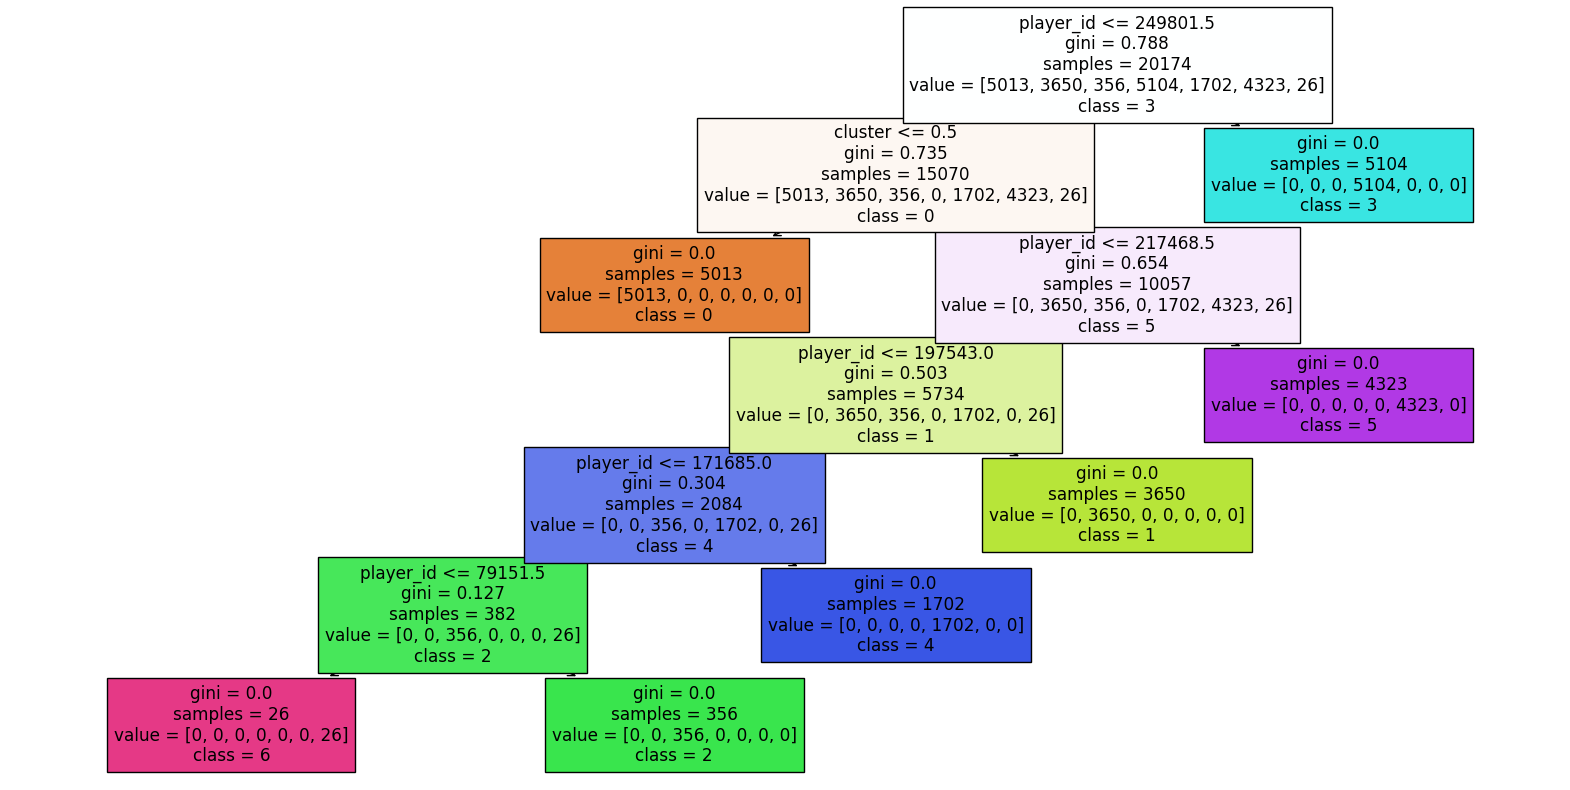

In [61]:
# prompt: now give me the visual of the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=numeric_cols, class_names=[str(i) for i in clf.classes_])
plt.show()


In [62]:
# prompt: now give me the confusion matrix and all its parameters

from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[1222    0    0    0    0    0    0]
 [   0  917    0    0    0    0    0]
 [   0    0   70    0    0    0    0]
 [   0    0    0 1312    0    0    0]
 [   0    0    0    0  445    0    0]
 [   0    0    0    0    0 1073    0]
 [   0    0    0    0    0    0    5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1222
           1       1.00      1.00      1.00       917
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00      1312
           4       1.00      1.00      1.00       445
           5       1.00      1.00      1.00      1073
           6       1.00      1.00      1.00         5

    accuracy                           1.00      5044
   macro avg       1.00      1.00      1.00      5044
weighted avg       1.00      1.00      1.00      5044

